In [2]:
import pandas as pd 

#**1 . load this data in sql and in pandas with a relation in sql** 


Step 1: Load the excel file

In [5]:
xls = pd.ExcelFile('Superstore_USA.xlsx')

Step 2: load the first sheet orders from excel sheet into df1

In [75]:
df1 = pd.read_excel(xls, 'Orders', index_col=0)
df1.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Row ID,,,,,,,,,,,,,,,,,,,,,
18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


Step 3: load the second sheet return from excel sheet into df2

In [7]:
df2 = pd.read_excel(xls, 'Returns', index_col=0)
df2

,Status
Order ID,
65,Returned
612,Returned
614,Returned
678,Returned
710,Returned
...,...
182681,Returned
182683,Returned
182750,Returned


Step 4: load the third sheet users from excel sheet into df3

In [49]:
df3 = pd.read_excel(xls, 'Users', index_col=0)
df3

,Manager
Region,
Central,Chris
East,Erin
South,Sam
West,William


#**2 . while loading this data you dont have to create a table manually you can use any automated approach to create a table and load a data in bulk in table**

#**Creating tables for supermarket, manager and return**

In [ ]:
import mysql.connector as con


mydb = con.connect(host='localhost',user = 'root', passwd= 'root')

cursor = mydb.cursor(buffered=True)

query1= "use task_on_pandas"
cursor.execute(query1)
query2 = "CREATE TABLE Superstore ( Order_Priority varchar(100) , Discount float, Unit_Price float, Shipping_Cost float, Customer_ID int, Customer_Name varchar(100) ,  Ship_Mode varchar(100) ,  Customer_Segment varchar(100) ,  Product_Category varchar(100) ,  Product_Sub_Category varchar(100) ,  Product_Container varchar(100) ,  Product_Name varchar(100) , Product_Base_Margin float, Region varchar(100),  State_or_Province varchar(100) , City varchar(100) ,  Postal_Code int, Order_Date DATETIME, Ship_Date DATETIME,  Profit float, Quantity_orderednew int, Sales float, Order_ID int)"

cursor.execute(query2)

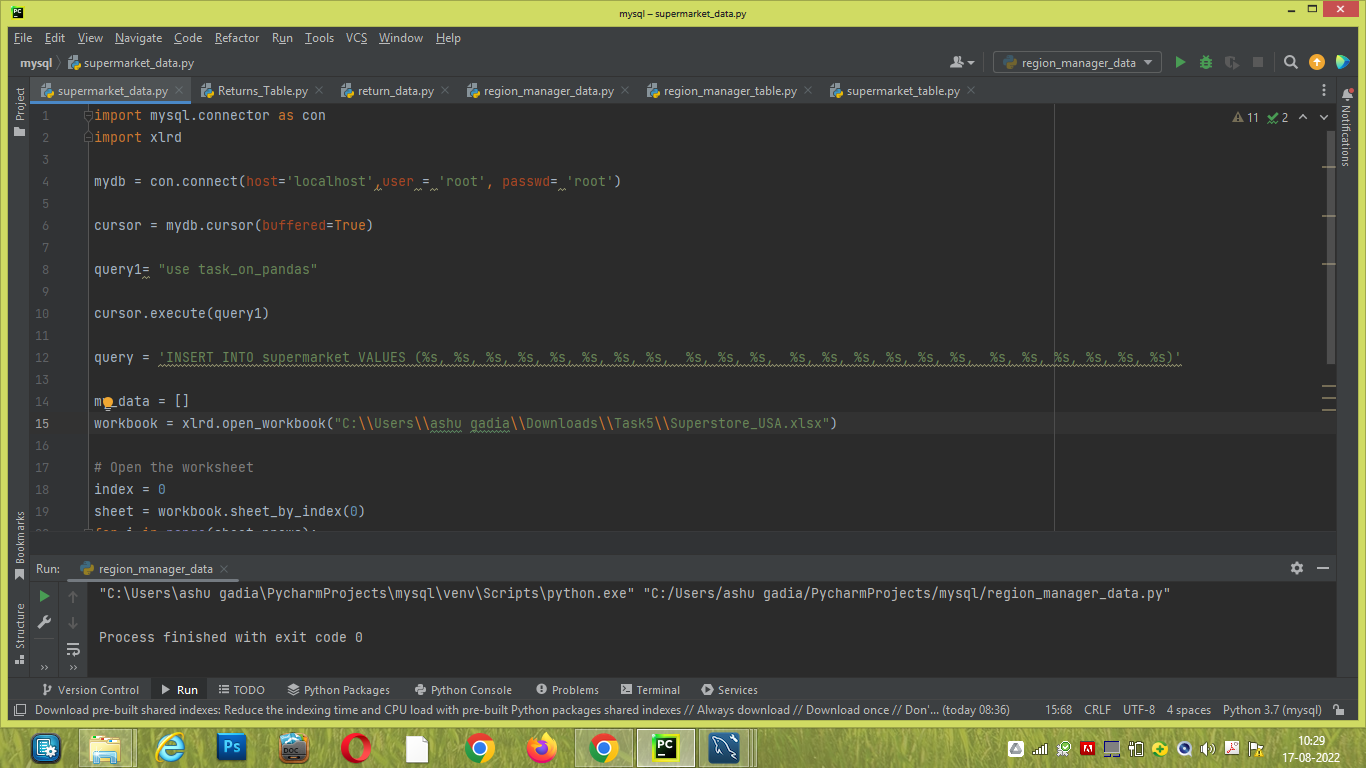

In [ ]:
import mysql.connector as con
import csv

mydb = con.connect(host='localhost',user = 'root', passwd= 'root')

cursor = mydb.cursor(buffered=True)

query1= "use task_on_pandas"
cursor.execute(query1)
query2 = "CREATE TABLE returns ( Order_ID int, Status varchar(100))"
cursor.execute(query2)

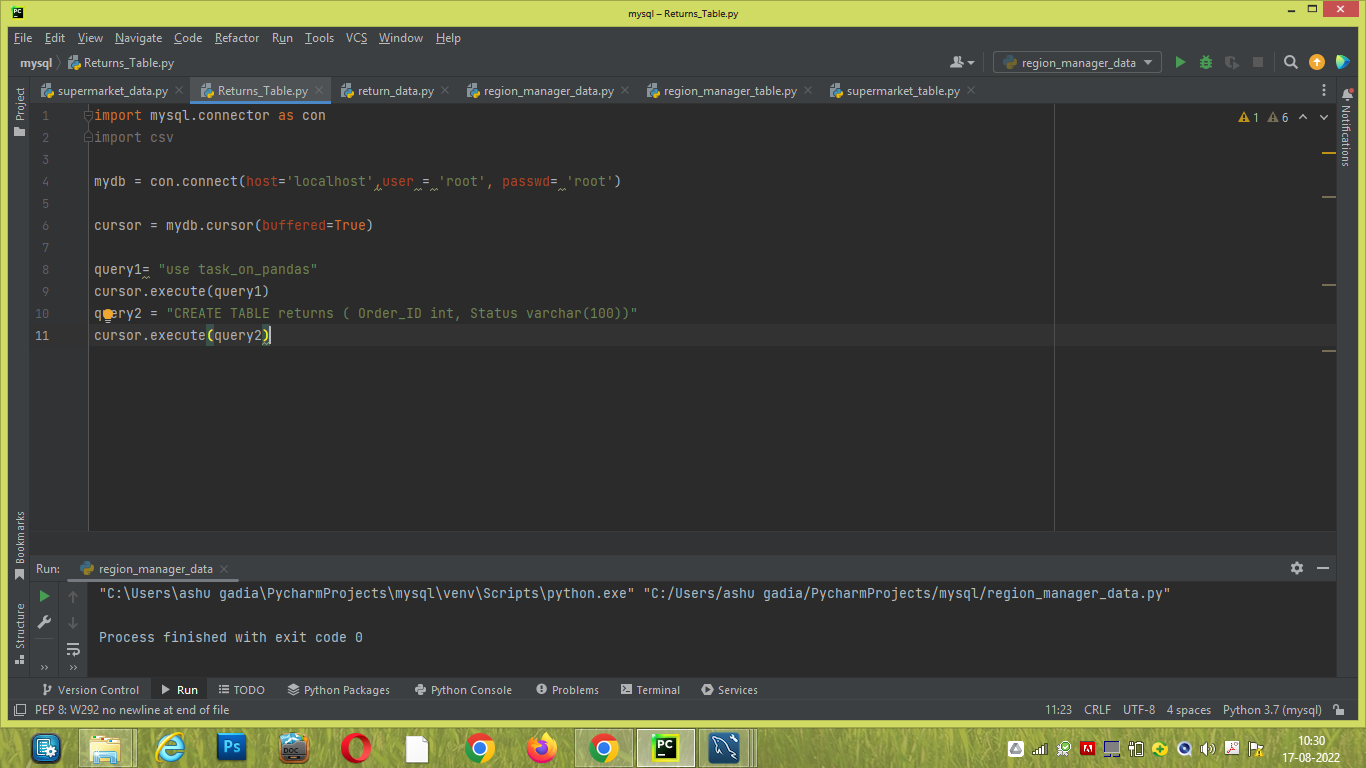

In [ ]:
import mysql.connector as con
mydb = con.connect(host = 'localhost', user='root', passwd ='root' )

cursor = mydb.cursor(buffered=True)
query1 = "use task_on_pandas"

cursor.execute(query1)

query2 = "CREATE TABLE region_manager(Region varchar(100), Manager varchar(100))"
cursor.execute(query2)


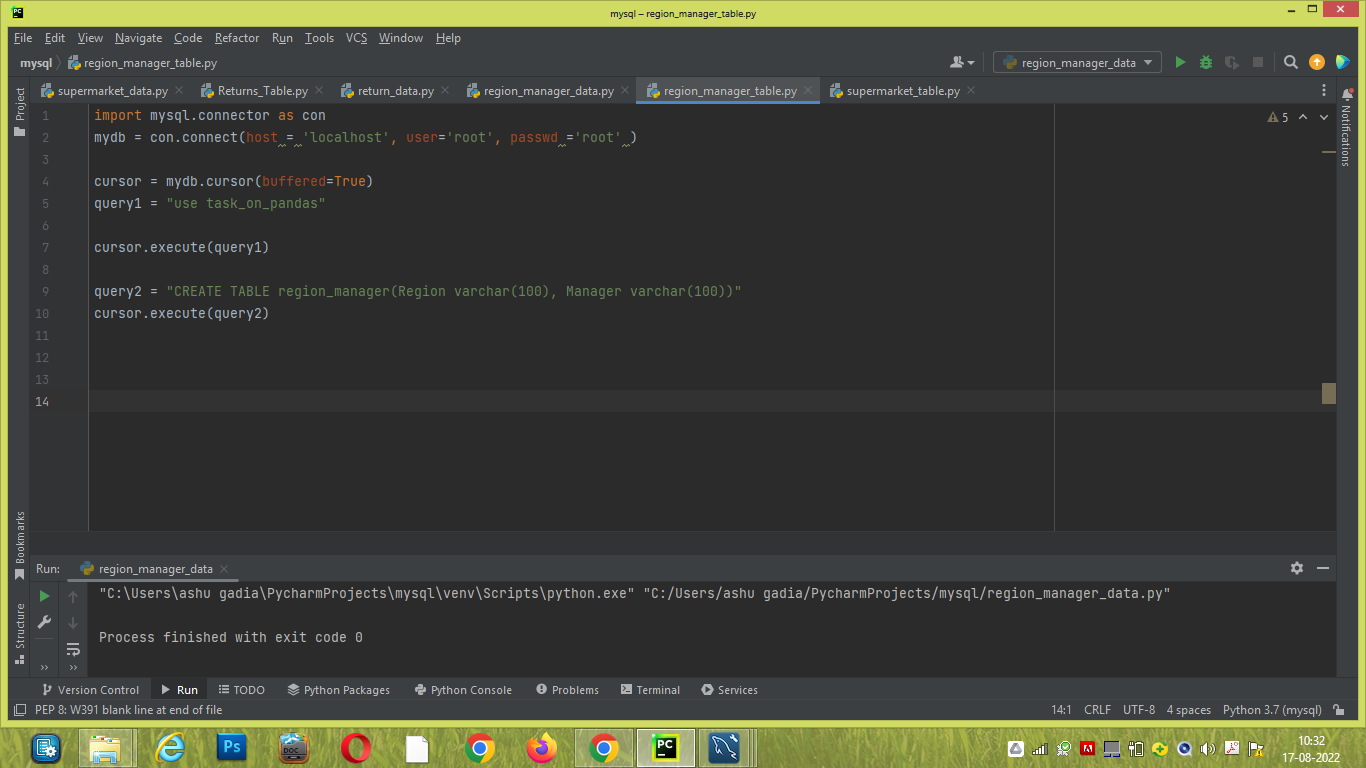

uploading data in the tables from excel file using python 

In [ ]:
import mysql.connector as con
import xlrd

mydb = con.connect(host='localhost',user = 'root', passwd= 'root')

cursor = mydb.cursor(buffered=True)

query1= "use task_on_pandas"

cursor.execute(query1)

query = 'INSERT INTO supermarket VALUES (%s, %s, %s, %s, %s, %s, %s, %s,  %s, %s, %s,  %s, %s, %s, %s, %s, %s,  %s, %s, %s, %s, %s, %s)'

my_data = []
workbook = xlrd.open_workbook("C:\\Users\\ashu gadia\\Downloads\\Task5\\Superstore_USA.xlsx")

# Open the worksheet
index = 0
sheet = workbook.sheet_by_index(0)
for i in range(sheet.nrows):
    for j in range(sheet.ncols):
        #print(sheet.cell_value(i,j), end="\t\t\t")
       if index !=0:
          my_data.append(sheet.cell_value(i,j))

cursor.executemany(query, my_data)
cursor.close()

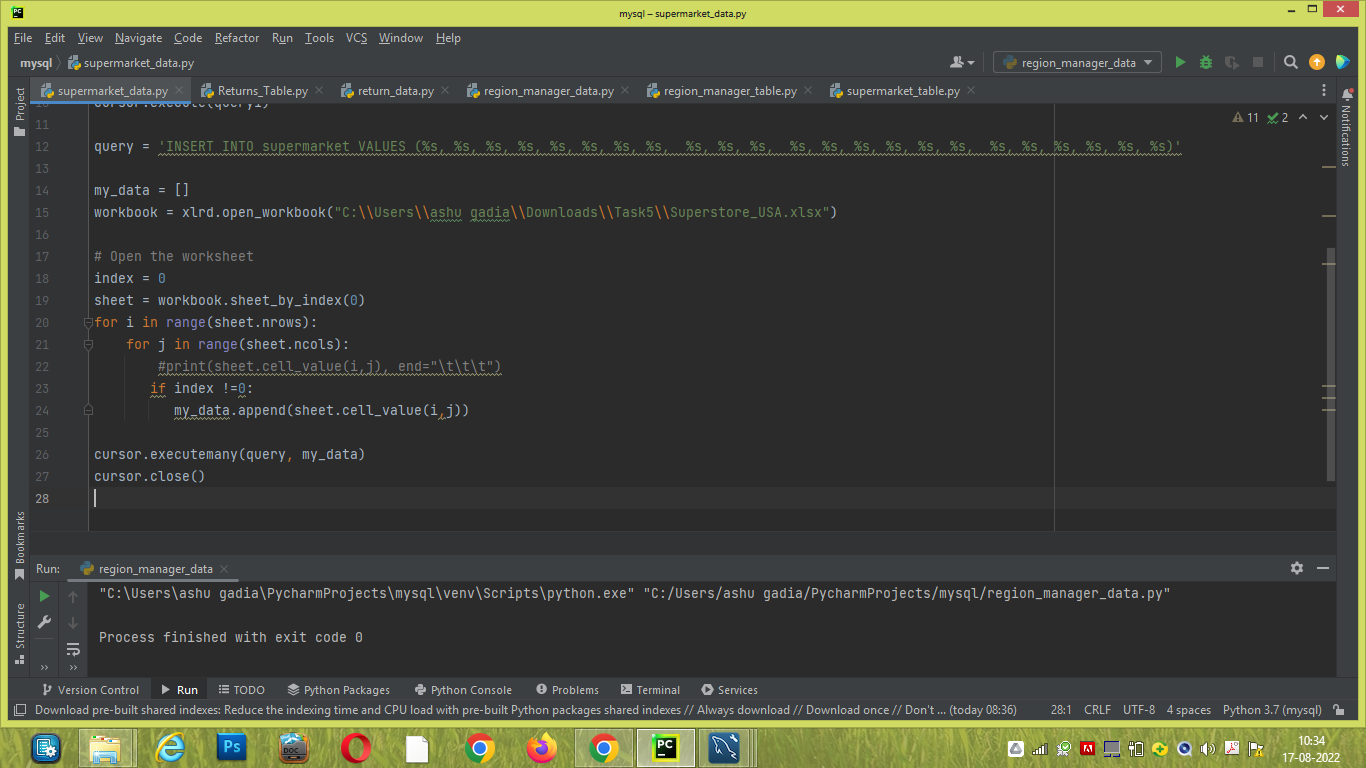

In [ ]:
import mysql.connector as con
import xlrd

mydb = con.connect(host='localhost',user = 'root', passwd= 'root')

cursor = mydb.cursor(buffered=True)

query1= "use task_on_pandas"

cursor.execute(query1)

query = 'INSERT INTO returns VALUES (%s, %s)'

my_data = []
workbook = xlrd.open_workbook("C:\\Users\\ashu gadia\\Downloads\\Task5\\Superstore_USA.xlsx")

# Open the worksheet
index = 0
sheet = workbook.sheet_by_index(1)
for i in range(sheet.nrows):
    for j in range(sheet.ncols):
        #print(sheet.cell_value(i,j), end="\t\t\t")
       if index !=0:
          my_data.append(sheet.cell_value(i,j))

cursor.executemany(query, my_data)
cursor.close()


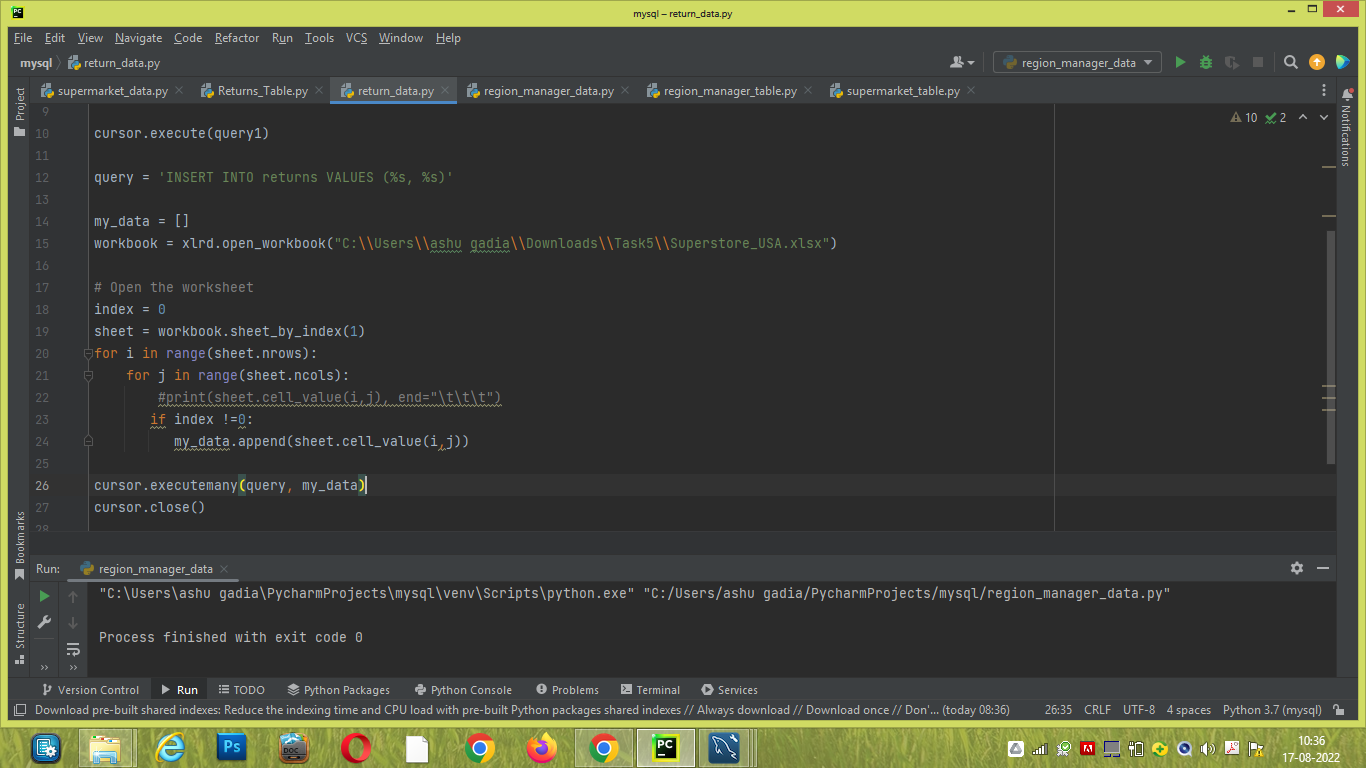

In [ ]:
import mysql.connector as con
import xlrd

mydb = con.connect(host='localhost',user = 'root', passwd= 'root')

cursor = mydb.cursor(buffered=True)

query1= "use task_on_pandas"

cursor.execute(query1)

query = 'INSERT INTO region_manager VALUES (%s, %s)'

my_data = []
workbook = xlrd.open_workbook("C:\\Users\\ashu gadia\\Downloads\\Task5\\Superstore_USA.xlsx")

# Open the worksheet
index = 0
sheet = workbook.sheet_by_index(2)
for i in range(sheet.nrows):
    for j in range(sheet.ncols):
        #print(sheet.cell_value(i,j), end="\t\t\t")
       if index !=0:
          my_data.append(sheet.cell_value(i,j))

cursor.executemany(query, my_data)
cursor.close()


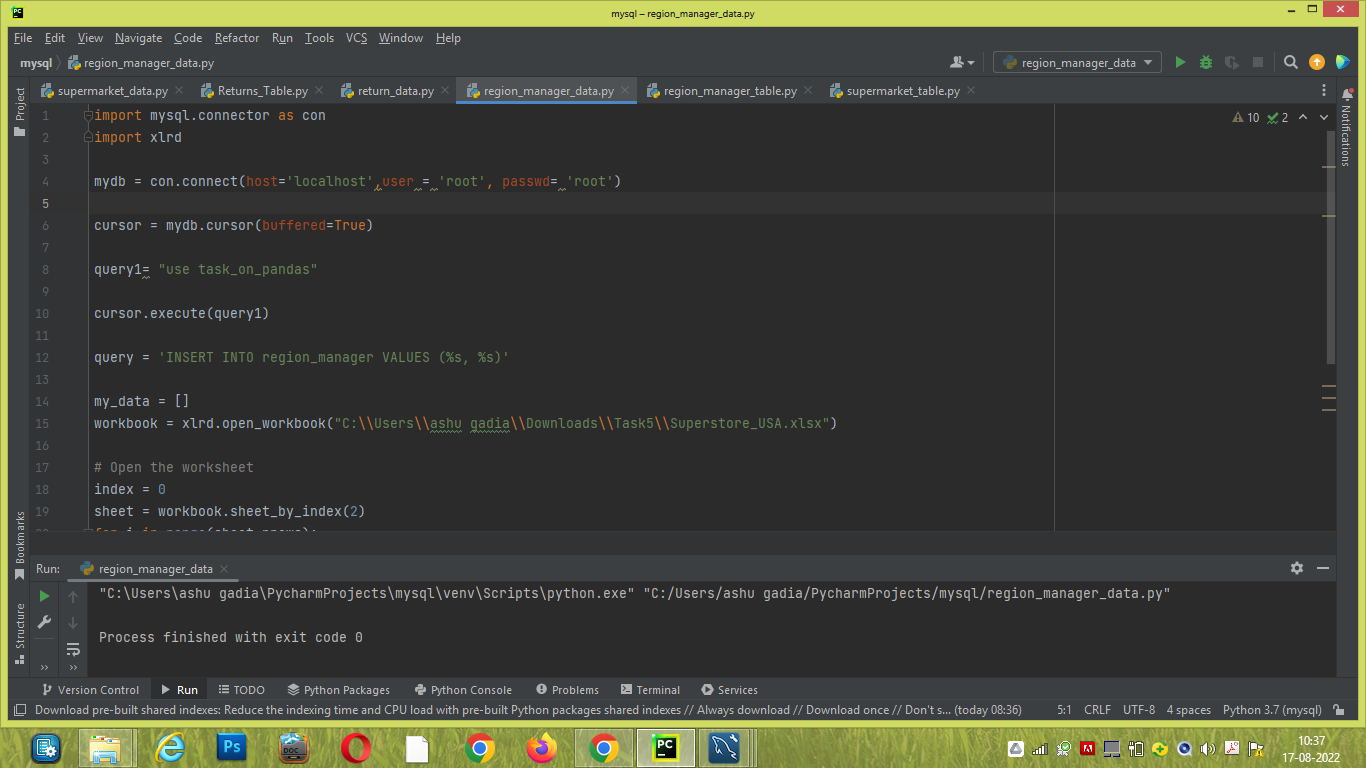

#**3 . Find out how return that we ahve recived and with a product id**

Step 1: How many return

In [68]:
df2.size

1634

step 2: 

In [74]:
df2

,Status
Order ID,
65,Returned
612,Returned
614,Returned
678,Returned
710,Returned
...,...
182681,Returned
182683,Returned
182750,Returned


#**4. try  to join order and return data both in sql and pandas** 

Step 1: left join

In [63]:
pd.merge(df1,df2, how ='left', on='Order ID')

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status
0,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,NaN
1,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,NaN
2,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,NaN
3,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,NaN
4,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,Envelopes,...,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,NaN
9422,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,Pens & Art Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,NaN
9423,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,Tables,...,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,NaN
9424,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,Office Furnishings,...,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,NaN


Step 2: right join

In [64]:
pd.merge(df1,df2, how = 'right', on='Order ID')

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,65,Returned
1,Medium,0.10,5.28,6.26,3011.0,Tammy Raynor,Regular Air,Corporate,Office Supplies,Paper,...,Massachusetts,Boston,2113.0,2013-10-20,2013-10-22,-166.290,105.0,552.03,612,Returned
2,Medium,0.01,65.99,2.50,3011.0,Tammy Raynor,Regular Air,Corporate,Technology,Telephones and Communication,...,Massachusetts,Boston,2113.0,2013-10-20,2013-10-22,881.676,90.0,5297.63,612,Returned
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,614,Returned
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,678,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,182681,Returned
1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,182683,Returned
1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,182750,Returned
1669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,182781,Returned


Step 3: Inner join

In [65]:
df4 = pd.merge(df1,df2,on='Order ID')
df4

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status
0,Low,0.05,5.85,2.27,21,Tony Wilkins Winters,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,New York,New York City,10012,2011-04-20,2011-04-24,-6.8200,9,54.79,9895,Returned
1,Medium,0.01,4.91,0.50,117,Linda Weiss,Regular Air,Home Office,Office Supplies,Labels,...,Washington,Seattle,98103,2010-04-04,2010-04-06,112.0600,47,228.46,13959,Returned
2,Medium,0.09,4.00,1.30,117,Linda Weiss,Express Air,Home Office,Office Supplies,Paper,...,Washington,Seattle,98103,2010-04-04,2010-04-06,16.7900,19,77.61,13959,Returned
3,High,0.02,3.28,5.00,117,Linda Weiss,Regular Air,Home Office,Office Supplies,Pens & Art Supplies,...,Washington,Seattle,98103,2013-08-16,2013-08-18,-89.0600,52,190.52,36038,Returned
4,Low,0.02,11.97,5.81,272,Eleanor Swain,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,North Carolina,Charlotte,28204,2013-08-12,2013-08-12,-81.9413,76,912.06,39490,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Not Specified,0.06,37.94,5.08,3075,Gordon Brandt,Regular Air,Corporate,Office Supplies,Paper,...,California,Los Angeles,90061,2013-01-04,2013-01-06,-33.9680,3,113.14,7107,Returned
94,Not Specified,0.10,55.29,5.08,3075,Gordon Brandt,Regular Air,Corporate,Office Supplies,Storage & Organization,...,California,Los Angeles,90061,2013-01-04,2013-01-05,163.1200,35,1886.52,7107,Returned
95,Medium,0.05,4.28,6.18,3075,Gordon Brandt,Express Air,Corporate,Office Supplies,Paper,...,California,Los Angeles,90061,2013-06-25,2013-06-27,-22.5600,12,73.71,42823,Returned
96,High,0.05,14.48,1.99,3079,Andrew Levine,Regular Air,Consumer,Technology,Computer Peripherals,...,Pennsylvania,Philadelphia,19112,2012-09-30,2012-10-02,165.2000,96,1337.67,13638,Returned


#**5. Try to find out how many unique customer that we have**

In [62]:
len(df1['Customer ID'].unique())

2703

#**6 . try to find out in how many regions we are selling a product and who is a manager for a respective region**

Step 1

In [60]:
df1.Region.unique()

array(['Central', 'West', 'East', 'South'], dtype=object)

Step 2: manage for respective region

In [61]:
df3

,Manager
Region,
Central,Chris
East,Erin
South,Sam
West,William


#**7 . find out how many different differnet shipement mode that we have and what is a percentage usablity of all the shipment mode with respect to dataset**


Step 1

In [54]:
df7=df1.groupby('Ship Mode')['Customer ID'].agg([('total','count')])
df7

,total
Ship Mode,
Delivery Truck,1283
Express Air,1107
Regular Air,7036


Step 2: creating a new column percentage usability on the basis of count of individual shipping mode on total.

In [59]:
df7['percent_usablity']=100*df7['total']/df7['total'].sum()


Step 3:

In [58]:
df7

,total,percent_usablity
Ship Mode,,
Delivery Truck,1283,13.611288
Express Air,1107,11.744112
Regular Air,7036,74.644600


#**8 . Create a new coulmn and try to find our a diffrence between order date and shipment date**

Step 1

In [30]:
df8=df1.copy()


In [ ]:
Step 2: Solution (creating a new column)

In [31]:
df8['time_in_delivery']=df8['Ship Date']-df8['Order Date']
df8

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,time_in_delivery
Row ID,,,,,,,,,,,,,,,,,,,,,
18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,2 days
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,1 days
23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,1 days
23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,1 days
23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,Envelopes,...,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,1 days
20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,Pens & Art Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,0 days
24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,Tables,...,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,2 days


#**9 . base on question number 8 find out for which order id we have shipment duration more than 10 days**

Step 1: creating a copy of dataframe and converting the dtype of time in delivery columnn to string

In [32]:
df9=df8.copy()
df9['time_in_delivery']=df9['time_in_delivery'].astype(str)
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9426 entries, 18606 to 24492
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        9426 non-null   object        
 1   Discount              9426 non-null   float64       
 2   Unit Price            9426 non-null   float64       
 3   Shipping Cost         9426 non-null   float64       
 4   Customer ID           9426 non-null   int64         
 5   Customer Name         9426 non-null   object        
 6   Ship Mode             9426 non-null   object        
 7   Customer Segment      9426 non-null   object        
 8   Product Category      9426 non-null   object        
 9   Product Sub-Category  9426 non-null   object        
 10  Product Container     9426 non-null   object        
 11  Product Name          9426 non-null   object        
 12  Product Base Margin   9354 non-null   float64       
 13  Region       

Step 2: Creating two new columns by splitting the data time in delivery column.

In [36]:
df9[['days_int','days_str']]=df9['time_in_delivery'].str.split(' ', expand = True)


Step 3: dropping the redundant column days str.

In [40]:
df9.drop('days_str', axis = 1, inplace = True)

Step 4: Converting the data type to int.

In [42]:
df9['days_int'] = df9['days_int'].astype(int)

Step 5: Solution

In [44]:
df9[df9['days_int']>10]['Order ID']

Row ID
18246    87215
23091    86318
23092    86318
20703    87957
20704    87957
20705    87957
2703     19556
2704     19556
2705     19556
18060    86177
21603    88223
19005    88352
24392    87572
21257    91294
26351    86434
26350    86436
26352    86436
20750    87300
2748     19841
2749     19841
2750     19841
20748    87300
20749    87300
Name: Order ID, dtype: int64

#**10 . Try to find out a list of a returned order which shipment duration was more then 15 days and find out that region manager as well**

(Since the shipment returned order duration is zero for more than 5 days as shown in the step2)

(we have reduced the days from 15 to 3 to show work on the data)

Step 1

In [45]:
df10 = pd.merge(df9,df2, on ='Order ID')
df10

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,time_in_delivery,days_int,Status
0,Low,0.05,5.85,2.27,21,Tony Wilkins Winters,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,10012,2011-04-20,2011-04-24,-6.8200,9,54.79,9895,4 days,4,Returned
1,Medium,0.01,4.91,0.50,117,Linda Weiss,Regular Air,Home Office,Office Supplies,Labels,...,98103,2010-04-04,2010-04-06,112.0600,47,228.46,13959,2 days,2,Returned
2,Medium,0.09,4.00,1.30,117,Linda Weiss,Express Air,Home Office,Office Supplies,Paper,...,98103,2010-04-04,2010-04-06,16.7900,19,77.61,13959,2 days,2,Returned
3,High,0.02,3.28,5.00,117,Linda Weiss,Regular Air,Home Office,Office Supplies,Pens & Art Supplies,...,98103,2013-08-16,2013-08-18,-89.0600,52,190.52,36038,2 days,2,Returned
4,Low,0.02,11.97,5.81,272,Eleanor Swain,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,28204,2013-08-12,2013-08-12,-81.9413,76,912.06,39490,0 days,0,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Not Specified,0.06,37.94,5.08,3075,Gordon Brandt,Regular Air,Corporate,Office Supplies,Paper,...,90061,2013-01-04,2013-01-06,-33.9680,3,113.14,7107,2 days,2,Returned
94,Not Specified,0.10,55.29,5.08,3075,Gordon Brandt,Regular Air,Corporate,Office Supplies,Storage & Organization,...,90061,2013-01-04,2013-01-05,163.1200,35,1886.52,7107,1 days,1,Returned
95,Medium,0.05,4.28,6.18,3075,Gordon Brandt,Express Air,Corporate,Office Supplies,Paper,...,90061,2013-06-25,2013-06-27,-22.5600,12,73.71,42823,2 days,2,Returned
96,High,0.05,14.48,1.99,3079,Andrew Levine,Regular Air,Consumer,Technology,Computer Peripherals,...,19112,2012-09-30,2012-10-02,165.2000,96,1337.67,13638,2 days,2,Returned


Step 2

In [46]:
df10[df10['days_int']>15]

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,time_in_delivery,days_int,Status


Step 3: Filter the data using return days more than 3.

In [47]:
df10[df10['days_int']>3][['Region','Order ID']]

,Region,Order ID
0,East,9895
5,South,39490
21,West,57638
25,West,51559
42,East,41760
43,East,41760
44,East,41760
45,East,41760
75,West,4610
88,West,32931


Step 4

In [50]:
df10_1= df10[df10['days_int']>3][['Region','Order ID']]
pd.merge(df10_1,df3,on='Region')

,Region,Order ID,Manager
0,East,9895,Erin
1,East,41760,Erin
2,East,41760,Erin
3,East,41760,Erin
4,East,41760,Erin
5,South,39490,Sam
6,West,57638,William
7,West,51559,William
8,West,4610,William
9,West,32931,William


#**11 . Gorup by region and find out which region is more profitable**

Step 1

In [25]:
df11 = df1.copy()

Step 2: Filtering based on groupby and then aggregate function application.

In [26]:

df11_1=df11.groupby('Region')['Profit'].agg([('total_profit','sum')])

Step 3: Solution

In [27]:
df11_1.loc[df11_1.total_profit.idxmax()]

total_profit    519825.567067
Name: Central, dtype: float64

#**12.Try to find out overalll in which country we are giving more discount**

Step1

In [22]:
df12 =df1.copy()

step 2: Create a new column total discount

In [23]:

df12['total_discount']=df12['Discount']*df12['Unit Price']*df12['Quantity ordered new']


Step 3: Filtering data based on state and apply aggregate function and then sorting it.

In [21]:
df12_1 = df12.groupby('State or Province')['total_discount'].agg([('agg_discount','sum')])
df12_1.agg_discount.sort_values(ascending=False)

State or Province
California              58085.6249
New York                43362.9913
Illinois                33705.6060
Florida                 31099.3219
Texas                   26715.1232
Washington              25114.4270
Michigan                15920.1583
Ohio                    14995.9760
Pennsylvania            12830.5552
North Carolina          11961.8027
Massachusetts           11824.0286
Georgia                 10513.2177
Minnesota                9593.9506
Indiana                  9232.6065
District of Columbia     7939.2985
Virginia                 7284.3055
Wisconsin                7229.8032
New Jersey               7067.3554
Oregon                   6779.5904
Maryland                 6766.5758
Arizona                  6613.2563
Maine                    5840.6049
Kansas                   5685.9687
Missouri                 5485.1900
Alabama                  5326.4939
Colorado                 5250.3003
Utah                     5234.3870
Iowa                     5084.7443
Id

Step 4 : Solution

In [24]:
df12_1.loc[df12_1['agg_discount'].idxmax()]

agg_discount    58085.6249
Name: California, dtype: float64

#**13 . Give me a list of unique postal code** 

Step1

In [17]:
df13 =df1.copy()
df13.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

Step 2: Solution

In [18]:
df13['Postal Code'].unique()

array([60101, 98221, 91776, ..., 61832, 62521, 26554])

#**14 . which customer segement is more profitalble find it out** 

Step 1


In [ ]:
df14 = df1.copy()

Step 2: Filering the data 

In [15]:
df14_1= df14.groupby('Customer Segment')['Profit'].agg([('tot_profit','sum')])
df14_1

,tot_profit
Customer Segment,
Consumer,206559.625348
Corporate,505538.627783
Home Office,283869.553814
Small Business,316474.592482


Step 3: Solution

In [16]:
df14_1.loc[df14_1.tot_profit.idxmax()]

tot_profit    505538.627783
Name: Corporate, dtype: float64

#**15 . try to find out the 10th most loss making product catagory.**

Since the product category has only 4 variants as shown in the step no. 2. We have considered product sub category for the question as it has ample varaints.



Step1:

In [10]:
df15 = df1.copy()


Step2:

In [11]:
df15['Product Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

Step3:

In [12]:
df15['Product Sub-Category'].unique()

array(['Labels', 'Pens & Art Supplies', 'Paper',
       'Scissors, Rulers and Trimmers', 'Telephones and Communication',
       'Office Machines', 'Chairs & Chairmats', 'Appliances', 'Bookcases',
       'Tables', 'Envelopes', 'Office Furnishings', 'Rubber Bands',
       'Binders and Binder Accessories', 'Storage & Organization',
       'Computer Peripherals', 'Copiers and Fax'], dtype=object)

Step 4: Filtering Data   

In [13]:
df15_1 = df15.groupby('Product Sub-Category')['Profit'].agg([('tot_profit','sum')]).sort_values(by='tot_profit')
df15_1.head()

,tot_profit
Product Sub-Category,
Tables,-72495.061875
Bookcases,-7708.748564
Rubber Bands,-2841.722459
"Scissors, Rulers and Trimmers",-1936.849120
Pens & Art Supplies,1195.902840


Step5 : Solution

In [14]:
df15_1.iloc[9]

tot_profit    87917.842513
Name: Computer Peripherals, dtype: float64

#**16 . Try to find out 10 top  product with highest margins**

Step 1

In [8]:
df16 =df1.copy()

Step2 : Filtering Data

In [9]:
df16_1=df16.loc[:,['Product Base Margin','Product Name']].drop_duplicates(subset=None, keep='first', inplace=False)
df16_1=df16_1.sort_values(by='Product Base Margin', ascending= False)
df16_1.iloc[:10]

,Product Base Margin,Product Name
Row ID,,
22361,0.85,Office Impressions Heavy Duty Welded Shelving ...
3815,0.85,Accessory27
22122,0.85,Sterling Rubber Bands by Alliance
3394,0.85,Accessory4
18240,0.85,Belkin OmniView SE Rackmount Kit
22585,0.84,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv..."
23784,0.84,Serrated Blade or Curved Handle Hand Letter Op...
19824,0.84,Tennsco Commercial Shelving
22088,0.83,Eldon Shelf Savers™ Cubes and Bins
